# 📊 HR Data Cleaning Utilities (v1.0)
 
This notebook demonstrates how to **simulate messy HR data** and then build a cleaning pipeline to make it analysis-ready.  
Data cleaning is a critical step in People Analytics — poor quality data = misleading insights.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random

## 1️⃣ Create a Messy HR Dataset
 
We start from the processed dataset and intentionally add issues:
- Duplicates
- Missing values
- Inconsistent casing
- Invalid dates

In [4]:
# Load original dataset
df = pd.read_csv("processed_hr_data.csv")
 
# 1. Add duplicates
df = pd.concat([df, df.sample(50, random_state=42)], ignore_index=True)
 
# 2. Introduce missing values randomly
for col in ["JobRole", "MaritalStatus"]:
    df.loc[df.sample(frac=0.05, random_state=42).index, col] = np.nan
 
# 3. Mess up text casing
df["Department"] = df["Department"].str.upper()
 
# 4. Add fake date column (with some invalid values)
dates = pd.date_range("2010-01-01", "2020-12-31", freq="ME").strftime("%Y-%m-%d").tolist()
df["DateOfJoining"] = [random.choice(dates + ["not_a_date"]) for _ in range(len(df))]
 
# Save messy dataset
df.to_csv("messy_hr_data.csv", index=False)
print("Messy dataset created !")

Messy dataset created !


## 2️⃣ Explore the Messy Data
Before cleaning, let’s check shape, null values, and visualize missing data.

Initial shape: (1520, 37)
Age               0
Attrition         0
BusinessTravel    0
DailyRate         0
Department        0
dtype: int64


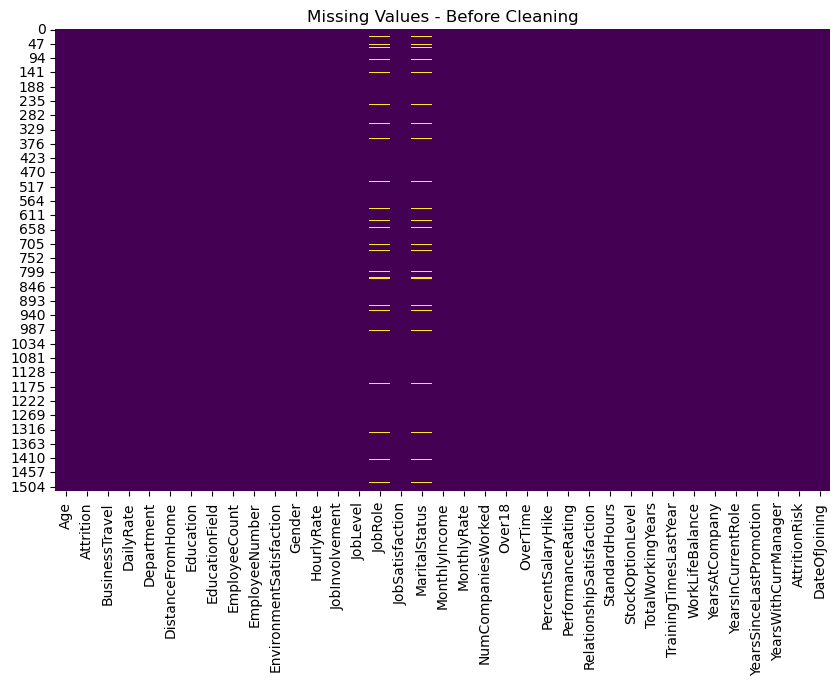

In [6]:
df = pd.read_csv("messy_hr_data.csv")
print("Initial shape:", df.shape)
print(df.isnull().sum().head())
 
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values - Before Cleaning")
plt.savefig("images/missing_values_before.png", dpi=300, bbox_inches="tight")
plt.show()

## 3️⃣ Apply Cleaning Steps
Now we:
1. Remove duplicates  
2. Fill missing values  
3. Normalize categorical values  
4. Convert date columns into proper format

In [7]:
# 1. Drop duplicates
df = df.drop_duplicates()
 
# 2. Fill missing values
df = df.fillna({
    "JobRole": "Unknown",
    "MaritalStatus": "Unknown"
})
 
# 3. Normalize categorical values
df["Department"] = df["Department"].str.title().str.strip()
df["JobRole"] = df["JobRole"].str.title().str.strip()
 
# 4. Fix Date column
df["DateOfJoining"] = pd.to_datetime(df["DateOfJoining"], errors="coerce")

## 4️⃣ Verify the Cleaning
Check if missing values reduced and visualize again.

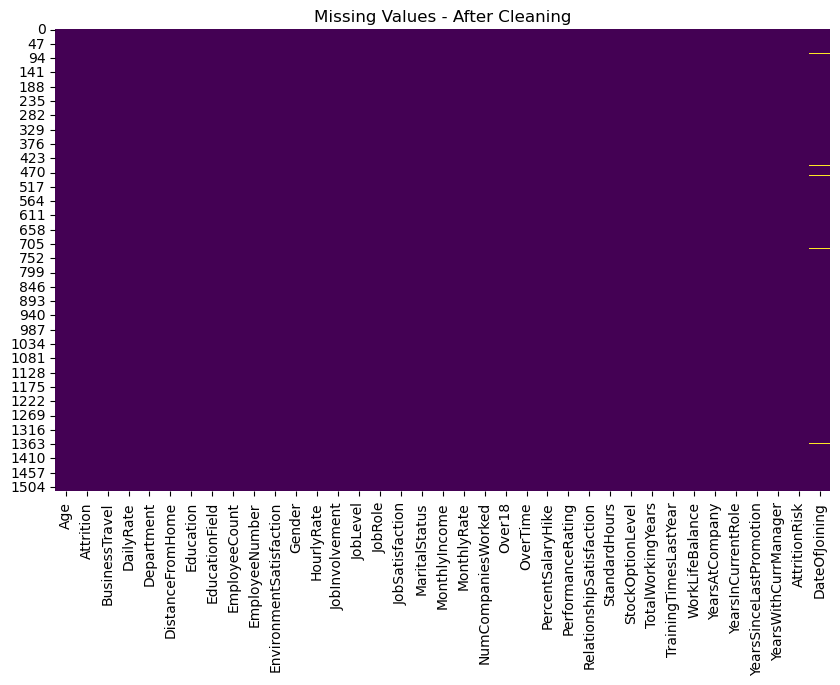

Final shape: (1519, 37)


In [8]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values - After Cleaning")
plt.savefig("images/missing_values_after.png", dpi=300, bbox_inches="tight")
plt.show()
 
print("Final shape:", df.shape)

## 5️⃣ Export the Cleaned Dataset
The cleaned dataset can now be used for further People Analytics projects.

In [9]:
df.to_csv("cleaned_hr_data.csv", index=False)
print("Cleaning complete! Cleaned dataset saved as cleaned_hr_data.csv")

Cleaning complete! Cleaned dataset saved as cleaned_hr_data.csv


## Create a Before -After Collage

In [10]:
from PIL import Image
 
# Load images
before = Image.open("images/missing_values_before.png")
after = Image.open("images/missing_values_after.png")
 
# Resize to same height
h = min(before.height, after.height)
before = before.resize((int(before.width * h / before.height), h))
after = after.resize((int(after.width * h / after.height), h))
 
# Combine side by side
collage = Image.new("RGB", (before.width + after.width, h))
collage.paste(before, (0, 0))
collage.paste(after, (before.width, 0))

In [11]:
# Save collage
collage.save("images/missing_values_collage.png")
print("Collage saved at images/missing_values_collage.png")

Collage saved at images/missing_values_collage.png


# ✅ Conclusions
 
- Automated pipeline successfully cleaned the dataset.
- Issues fixed: duplicates, missing values, inconsistent casing, invalid dates.
- Before-After Collage created